In [160]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

In [161]:
def std_classification(df):
    temp = zscore(df)
    temp = [0 if l<=0.0 else 1 for l in temp.values]
    return temp

In [162]:
mcq_scores = pd.read_csv("../data/mcq_scores.tsv", sep="\t")
mcq_scores["class"] = mcq_scores[["kg"]].apply(std_classification)

essay_scores = pd.read_csv("../data/essay_scores.csv")
essay_scores["class"] = essay_scores[["kg"]].apply(std_classification)

In [163]:
mcq_scores.sort_values(by="kg", ascending=False)

,uid,pre,post,kg,task,source,class
60,71,0.2,0.8,0.6,exploration,sal-lightning,1
12,16,0.2,0.8,0.6,exploration,sal-lightning,1
54,63,0.3,0.9,0.6,exploration,sal-lightning,1
64,75,0.3,0.9,0.6,exploration,sal-lightning,1
71,84,0.4,1.0,0.6,exploration,sal-lightning,1
...,...,...,...,...,...,...,...
9,11,0.7,0.6,-0.1,exploration,sal-lightning,0
38,45,0.7,0.6,-0.1,exploration,sal-lightning,0
22,27,0.4,0.2,-0.2,exploration,sal-lightning,0
25,30,0.5,0.3,-0.2,exploration,sal-lightning,0


In [164]:
df_our = pd.read_csv(f"../data/our_regressions.tsv", sep="\t")
df_cole = pd.read_csv(f"../data/cole2011_regressions.tsv", sep="\t")

<Axes: xlabel='reading_sequence', ylabel='eyes_on_word'>

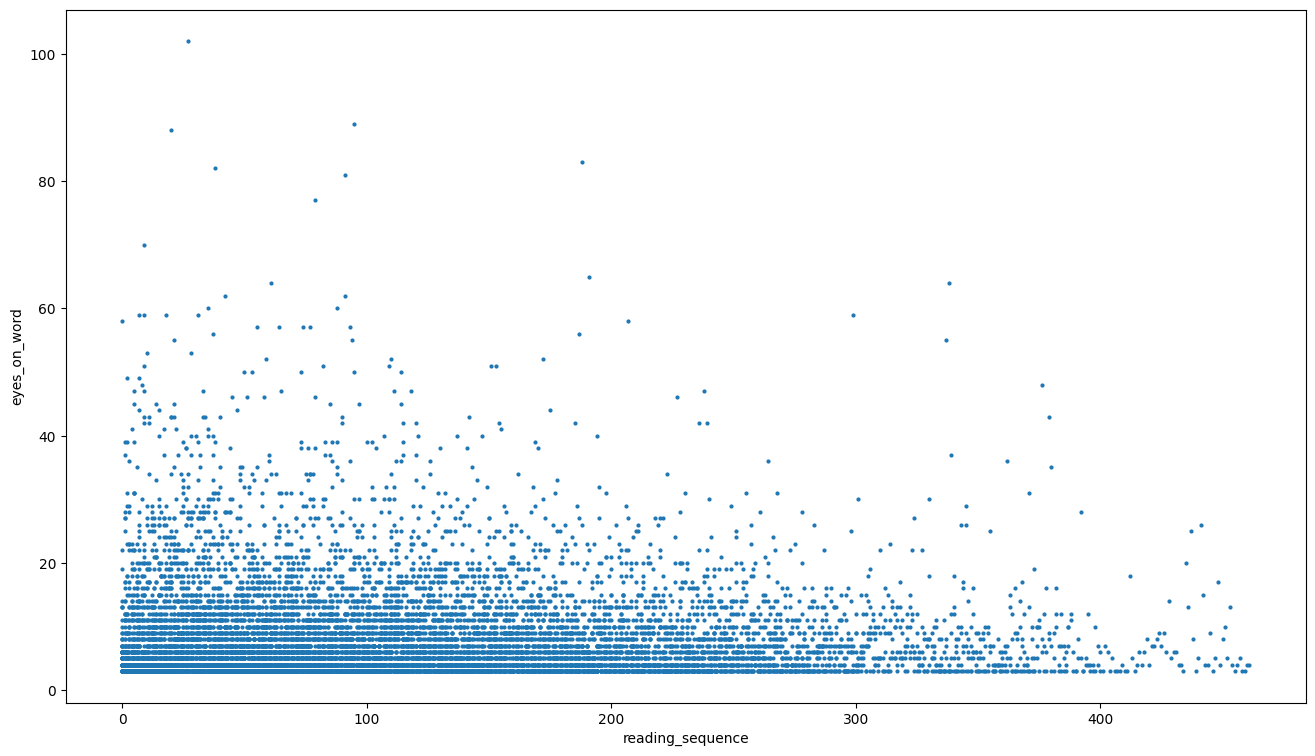

In [165]:
df_our = df_our[df_our["reading_sequence"] > -1]
df_our = df_our[df_our["regression"] == False]

features = pd.merge(df_our, mcq_scores, on="uid", how="inner")

low = features[features["class"] == 0]
high = features[features["class"] == 1]

ax1 = low[["uid", "reading_sequence", "eyes_on_word"]].groupby(["uid", "reading_sequence"]).agg(np.ptp).reset_index().plot(kind='scatter', x='reading_sequence', y='eyes_on_word', style=["." "r"], s=4, figsize=[16,9])
ax1


<Axes: xlabel='reading_sequence', ylabel='eyes_on_word'>

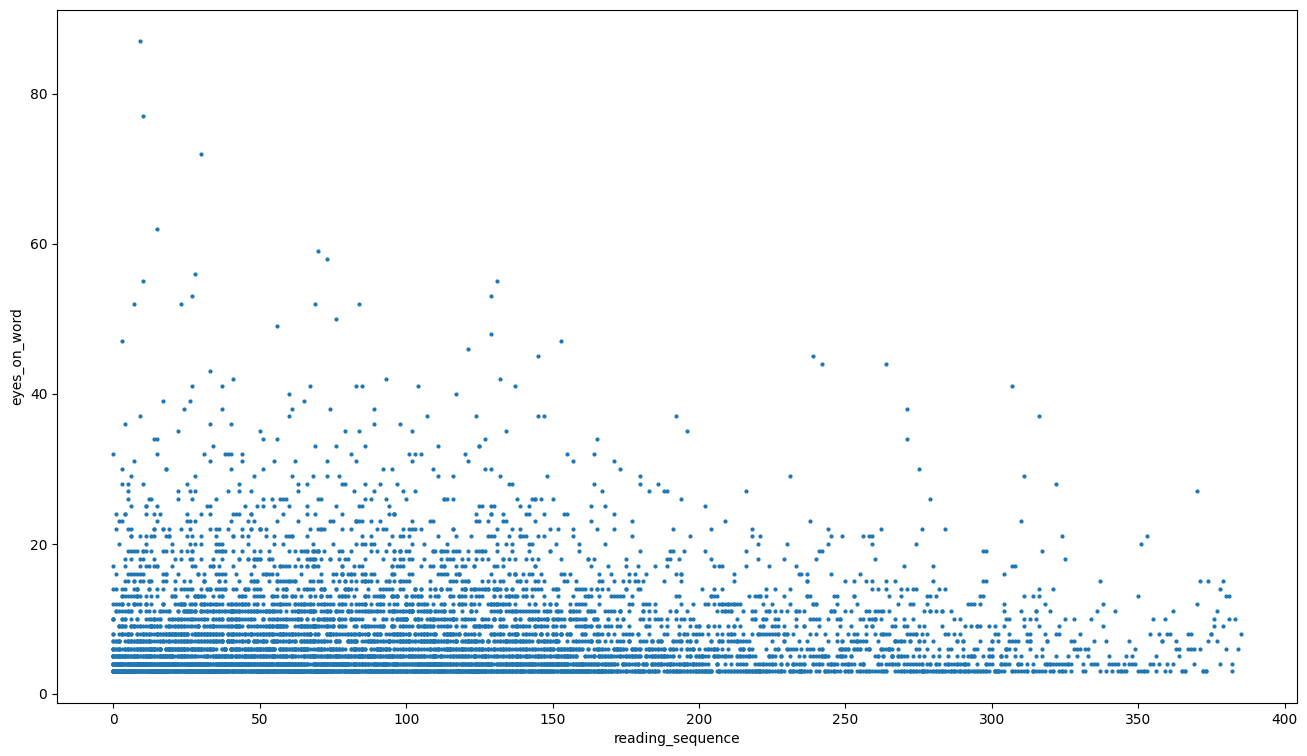

In [166]:
ax2 = high[["uid", "reading_sequence", "eyes_on_word"]].groupby(["uid", "reading_sequence"]).agg(np.ptp).reset_index().plot(kind='scatter', x='reading_sequence', y='eyes_on_word', style=["." "r"], s=4, figsize=[16,9])
ax2